In [1]:
import pyedflib

import mne
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from scipy.signal import butter, filtfilt

from os import listdir
import os

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from IPython.display import clear_output

In [3]:
record_names = ["MoscowSpecialistsData/P2.edf", 
                "MoscowSpecialistsData/P3.edf", 
                "MoscowSpecialistsData/P4.edf", 
                "MoscowSpecialistsData/P5.edf", 
                "MoscowSpecialistsData/P6.edf", 
                "MoscowSpecialistsData/P8.edf"]

In [5]:
all_labels = []

for i in range(len(record_names)):
    if "Moscow" in record_names[i]:
        all_labels.append(np.load("MoscowSpecialistsData/Labels/" + 
                                  record_names[i][22:] + "freq" + str(199) + ".npy"))

In [10]:
def CollectCharacteristics(labels):  
    lens = []
    
    
    c = 0
    in_event = False
    for i in range(len(labels)):
        if labels[i] == 1:
            if not in_event:
                idx_start = i
            in_event = True
            c += 1
        elif in_event:
            lens.append(c)
            c = 0
            in_event = False
                
    return lens   

In [11]:
all_durs = []
for i in range(len(all_labels)):
    durs = CollectCharacteristics(all_labels[i])
    all_durs.append(durs)

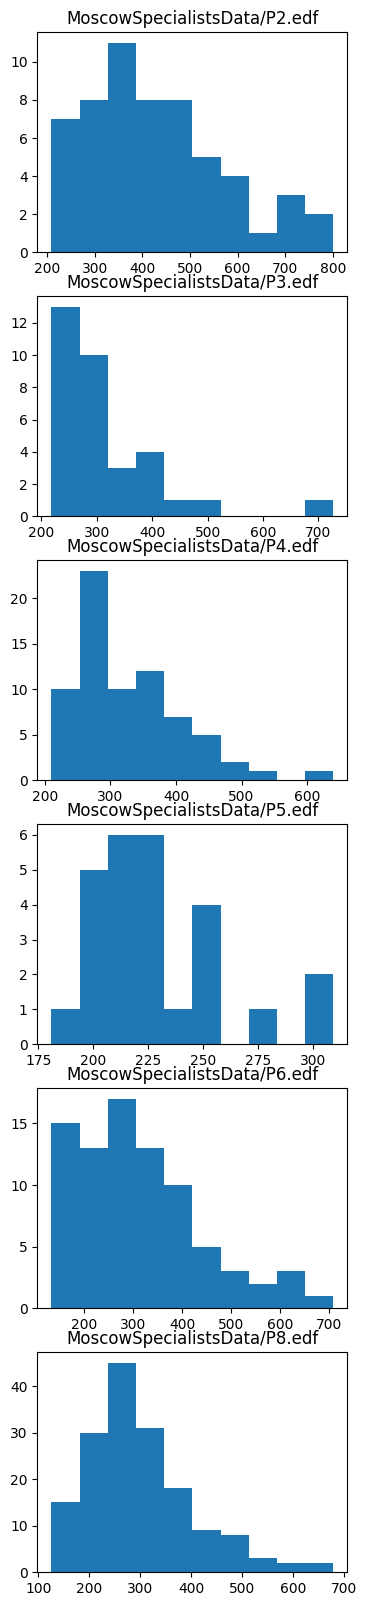

In [15]:
f, axes = plt.subplots(6, 1, figsize=(4, 20))
for i in range(len(all_labels)):
    axes[i].hist(all_durs[i])
    axes[i].set_title(record_names[i])

То есть длительности примерно одни и те же, обрезать по длительности нет смысла